# CREACIÓN DE MODELOS DE DATOS - CLASIFICACIÓN

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Cargo los datos

In [3]:
df = pd.read_csv("peliculas_analisis_ML.csv",index_col=0)
df.head()

,puntuacion,total_premios,razzie,director,guion,musica,fotografia,reparto_1,reparto_2,reparto_3,...,drama,fantastico,infantil,intriga,musical,romance,terror,thriller,western,pais
0,3.7,0,0,0,0,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,5179
1,5.6,0,0,0,0,2,0,2,0,0,...,0,0,0,0,0,0,0,1,0,5179
2,6.3,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,5179
3,6.6,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,716
4,5.1,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1042


Voy a discretizar la variable objetivo para poder modelar un algoritmo de clasificación y ver si mejora la performance en cuanto a uno de regresión

In [5]:
df["puntuacion"].describe()

count    10128.000000
mean         5.974812
std          1.129741
min          3.700000
25%          5.100000
50%          6.200000
75%          6.800000
max          9.000000
Name: puntuacion, dtype: float64

Se pide:

- Escalar los datos previamente. StandardScaler
- Entrenar un modelo y obtener su score de test: decission tree, log regression y SVC 
- Un voting con los tres y comparar
  
- Un modelo y su score de cada uno de los 6 ensembles (RandomForestClassifier, 
                                ExtraTreesClassifier, 
                                GradientBoostingClassifier, 
                                AdaBoostClassifier,
                                XGBooost y catboost)
- Elegir el que mejor resultados da de todos y optimizar sus parametros usando GridSearch (cv=5), al menos optimizar 3 parametros.
- Hacer un voting con los otros 5 y comparar.

In [35]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="puntuacion").values
y = df["puntuacion"].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

### Escalar los datos previamente. StandardScaler

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Comienzo a probar modelos para ver su performance

Obtengo la media del target para tener una referencia en cuanto a la métrica MAE

In [73]:
df["puntuacion"].mean()

5.974812401263823

### RandomForestRegressor

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

seed = 42

RndFrst_Model = RandomForestRegressor(random_state= seed)
RndFrst_Model.fit(X_train, y_train)                          

y_pred_RndFrst_Model = RndFrst_Model.predict(X_test)
         
R2_RndFrst_Model = r2_score(y_test, y_pred_RndFrst_Model)
MAE_RndFrst_Model = mean_absolute_error(y_test, y_pred_RndFrst_Model)

print("R2 (test):", round(((R2_RndFrst_Model)*100),2),"%")
print("MAE (test):", MAE_RndFrst_Model)

R2 (test): 57.51 %
MAE (test): 0.5836928133480159


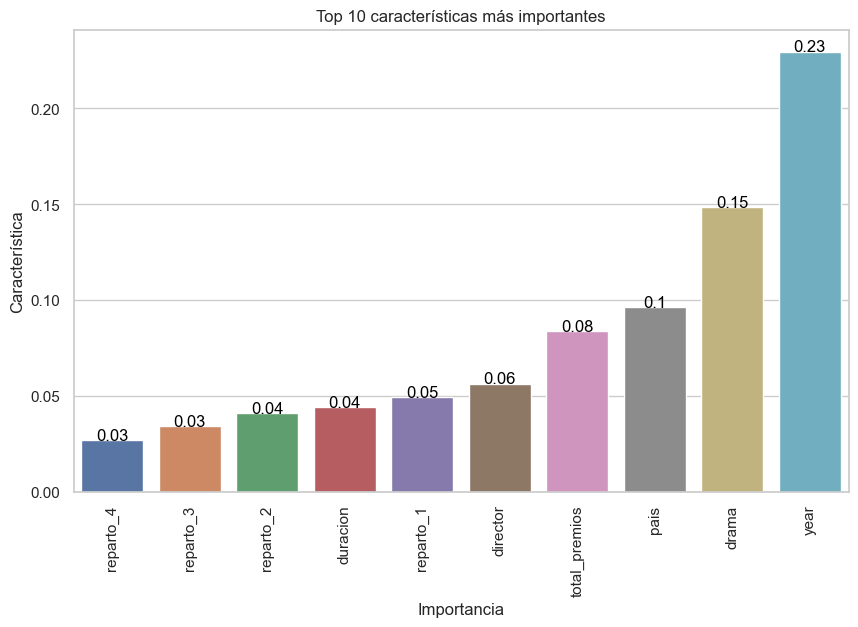

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las características más importantes
feature_importances = RndFrst_Model.feature_importances_
important_features = sorted(zip(feature_importances, df.columns[1:]), reverse=True)[:10]
important_features_names = [f[1] for f in important_features][::-1]
important_features_importances = [f[0] for f in important_features][::-1]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.barplot(x=important_features_names, y=important_features_importances)

# Agregar etiquetas a las barras
for i, v in enumerate(important_features_importances):
    plt.text(i, v, str(round(v, 2)), color='black', ha='center')

plt.xticks(rotation=90)
plt.title('Top 10 características más importantes')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

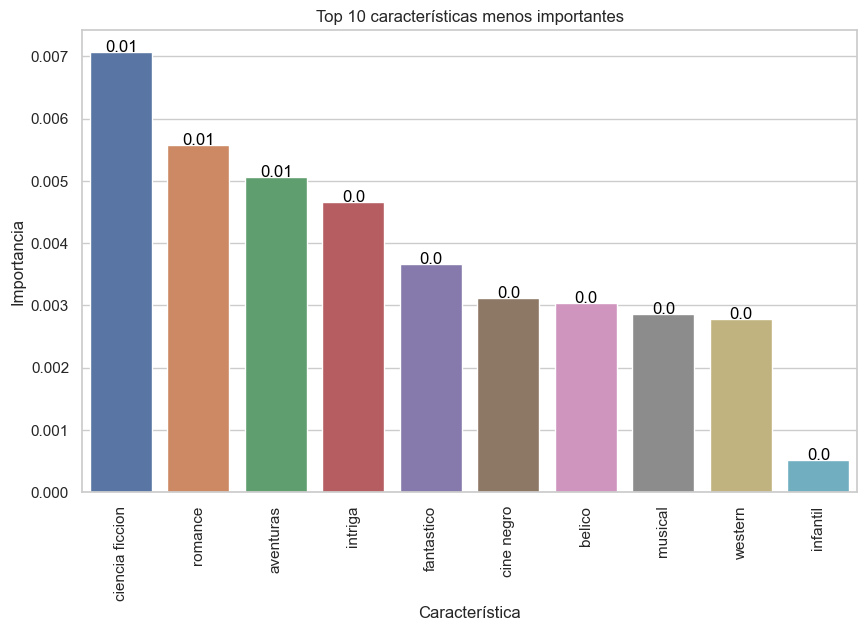

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las características menos importantes
feature_importances = RndFrst_Model.feature_importances_
important_features = sorted(zip(feature_importances, df.columns[1:]), reverse=False)[:10]
important_features_names = [f[1] for f in important_features][::-1]
important_features_importances = [f[0] for f in important_features][::-1]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.barplot(x=important_features_names, y=important_features_importances)
plt.title('Top 10 características menos importantes')
plt.xlabel('Característica')
plt.ylabel('Importancia')
plt.xticks(rotation=90)

# Agregar etiquetas a las barras
for i, v in enumerate(important_features_importances):
    plt.text(i, v, str(round(v, 2)), color='black', ha='center')

plt.show()

### Compruebo con le método SelectKBest cuales son las columnas de mayor importancia

In [ ]:
from sklearn.feature_selection import SelectKBest

print(X.shape)
sel = SelectKBest(k=5)
X_new = sel.fit_transform(X, Y)
print(X_new.shape)
print(sel.scores_)

pd.DataFrame({'column': names, 'score': sel.scores_}).sort_values('score', ascending=False)

### DecisionTreeRegressor

In [113]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error

seed = 42

DcsTree_Model = DecisionTreeRegressor(random_state= seed)
DcsTree_Model.fit(X_train, y_train)

y_pred_DcsTree_Model = DcsTree_Model.predict(X_test)

R2_DcsTree_Model = r2_score(y_test, y_pred_DcsTree_Model)
MAE_DcsTree_Model = mean_absolute_error(y_test, y_pred_DcsTree_Model)

print("R2 (test):", round(((R2_DcsTree_Model)*100),2),"%")
print("MAE (test):", MAE_DcsTree_Model)

R2 (test): 29.81 %
MAE (test): 0.7395488635986507


### LinearRegression

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

seed = 42

LinReg_Model = LinearRegression()
LinReg_Model.fit(X_train, y_train)

y_pred_LinReg_Model = LinReg_Model.predict(X_test)

R2_LinReg_Model = r2_score(y_test, y_pred_LinReg_Model)
MAE_LinReg_Model = mean_absolute_error(y_test, y_pred_LinReg_Model)

print("R2 (test):", round(((R2_LinReg_Model)*100),2),"%")
print("MAE (test):", MAE_LinReg_Model)

R2 (test): 51.66 %
MAE (test): 0.6433439039357763


### Support Vector Machine

In [116]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error

SupVecMac_Model = SVR()
SupVecMac_Model.fit(X_train, y_train)

y_pred_SupVecMac_Model = RndFrst_Model.predict(X_test)

R2_SupVecMac_Model= r2_score(y_test, y_pred_SupVecMac_Model)
MAE_SupVecMac_Model = mean_absolute_error(y_test, y_pred_SupVecMac_Model)

print("R2 (test):", round(((R2_SupVecMac_Model)*100),2),"%")
print("MAE (test):", MAE_SupVecMac_Model)

R2 (test): 57.51 %
MAE (test): 0.5836928133480159


### Red neuronal

In [117]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error

MLP_Model = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', random_state=seed)
MLP_Model.fit(X_train, y_train)

y_pred_MLP_Model = MLP_Model.predict(X_test)

R2_MLP_Model = r2_score(y_test, y_pred_MLP_Model)
MAE_SupVecMac_Model = mean_absolute_error(y_test, y_pred_MLP_Model)

print("R2 (test):", round(((R2_MLP_Model)*100),2),"%")
print("MAE (test):", MAE_SupVecMac_Model)

R2 (test): 54.89 %
MAE (test): 0.6100328266067323


### Ridge

In [118]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error

seed = 42

Ridge_Model = Ridge(random_state=seed)
Ridge_Model.fit(X_train, y_train)

y_pred_Ridge_Model = Ridge_Model.predict(X_test)

R2_Ridge_Model = r2_score(y_test, y_pred_Ridge_Model)
MAE_Ridge_Model = mean_absolute_error(y_test, y_pred_Ridge_Model)

print("R2 (test):", round(((R2_Ridge_Model)*100),2),"%")
print("MAE (test):", MAE_Ridge_Model)

R2 (test): 51.64 %
MAE (test): 0.6431795102133205


### Lasso

In [129]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error

seed = 42

Lasso_Model = Lasso(alpha = 10, max_iter= 100000, random_state=seed)
Lasso_Model.fit(X_train, y_train)

y_pred_Lasso_Model = Lasso_Model.predict(X_test)

R2_Lasso_Model = r2_score(y_test, y_pred_Lasso_Model)
MAE_Lasso_Model = mean_absolute_error(y_test, y_pred_Lasso_Model)

print("R2 (test):", round(((R2_Lasso_Model)*100),2),"%")
print("MAE (test):", MAE_Lasso_Model)

R2 (test): -0.02 %
MAE (test): 0.9980833830653246


### ElasticNet

In [130]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error

seed = 42

ElasticNet_Model = ElasticNet(alpha = 10, l1_ratio= 0.5, random_state=seed)
ElasticNet_Model.fit(X_train, y_train)

y_pred_ElasticNet_Model = ElasticNet_Model.predict(X_test)

R2_ElasticNet_Model = r2_score(y_test, y_pred_ElasticNet_Model)
MAE_ElasticNet_Model = mean_absolute_error(y_test, y_pred_ElasticNet_Model)

print("R2 (test):", round(((R2_ElasticNet_Model)*100),2),"%")
print("MAE (test):", MAE_ElasticNet_Model)

R2 (test): -0.02 %
MAE (test): 0.9980833830653246


### Lars

In [135]:
from sklearn.linear_model import Lars
from sklearn.metrics import r2_score, mean_absolute_error

seed = 42

Lars_Model = Lars(fit_intercept= True, random_state=seed)
Lars_Model.fit(X_train, y_train)

y_pred_Lars_Model = Lars_Model.predict(X_test)

R2_Lars_Model = r2_score(y_test, y_pred_Lars_Model)
MAE_Lars_Model = mean_absolute_error(y_test, y_pred_Lars_Model)

print("R2 (test):", round(((R2_Lars_Model)*100),2),"%")
print("MAE (test):", MAE_Lars_Model)

R2 (test): 51.64 %
MAE (test): 0.6431741870188492


### BayesianRidge

In [138]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score, mean_absolute_error

Bayesian_Model = BayesianRidge(n_iter = 5000)
Bayesian_Model.fit(X_train, y_train)

y_pred_Bayesian_Model = Bayesian_Model.predict(X_test)

R2_Bayesian_Model = r2_score(y_test, y_pred_Bayesian_Model)
MAE_Bayesian_Model = mean_absolute_error(y_test, y_pred_Bayesian_Model)

print("R2 (test):", round(((R2_Bayesian_Model)*100),2),"%")
print("MAE (test):", MAE_Bayesian_Model)

R2 (test): 51.63 %
MAE (test): 0.6434122337237622


### HuberRegressor

In [146]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import r2_score, mean_absolute_error

Huber_Reg_Model = HuberRegressor(epsilon = 1.5, alpha = 0.5)
Huber_Reg_Model.fit(X_train, y_train)

y_pred_Huber_Reg_Model = Huber_Reg_Model.predict(X_test)

R2_Huber_Reg_Model = r2_score(y_test, y_pred_Huber_Reg_Model)
MAE_Huber_Reg_Model = mean_absolute_error(y_test, y_pred_Huber_Reg_Model)

print("R2 (test):", round(((R2_Huber_Reg_Model)*100),2),"%")
print("MAE (test):", MAE_Huber_Reg_Model)

R2 (test): 51.69 %
MAE (test): 0.6396091687996805


### CatBoostRegressor

In [153]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error

seed = 42

CatBoost_Reg_Model = CatBoostRegressor(random_state= seed, verbose = False, learning_rate= 0.1, max_depth= 8, n_estimators= 300)
CatBoost_Reg_Model.fit(X_train, y_train)

y_pred_CatBoost_Reg_Model = CatBoost_Reg_Model.predict(X_test)

R2_CatBoost_Reg_Model = r2_score(y_test, y_pred_CatBoost_Reg_Model)
MAE_CatBoost_Reg_Model = mean_absolute_error(y_test, y_pred_CatBoost_Reg_Model)

print("R2 (test):", round(((R2_CatBoost_Reg_Model)*100),2),"%")
print("MAE (test):", MAE_CatBoost_Reg_Model)

R2 (test): 60.81 %
MAE (test): 0.5689055669850329


### GradientBoostingRegressor

In [160]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

seed = 42

GradBoost_Reg_Model = GradientBoostingRegressor(random_state= seed, verbose = False, learning_rate= 0.1, max_depth= 8, n_estimators= 300)
GradBoost_Reg_Model.fit(X_train, y_train)

y_pred_GradBoost_Reg_Model = GradBoost_Reg_Model.predict(X_test)

R2_GradBoost_Reg_Model = r2_score(y_test, y_pred_GradBoost_Reg_Model)
MAE_GradBoost_Reg_Model = mean_absolute_error(y_test, y_pred_GradBoost_Reg_Model)

print("R2 (test):", round(((R2_GradBoost_Reg_Model)*100),2),"%")
print("MAE (test):", R2_GradBoost_Reg_Model)

R2 (test): 58.19 %
MAE (test): 0.5818736538974697


### XGBRegressor

In [159]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

seed = 42

XGBBoost_Reg_Model = XGBRegressor(random_state=seed, learning_rate= 0.1, max_depth= 8, n_estimators= 300)
XGBBoost_Reg_Model.fit(X_train, y_train)

y_pred_XGBBoost_Reg_Model = XGBBoost_Reg_Model.predict(X_test)

R2_XGBBoost_Reg_Model = r2_score(y_test, y_pred_XGBBoost_Reg_Model)
MAE_XGBBoost_Reg_Model = mean_absolute_error(y_test, y_pred_XGBBoost_Reg_Model)

print("R2 (test):", round(((R2_XGBBoost_Reg_Model)*100),2),"%")
print("MAE (test):", MAE_XGBBoost_Reg_Model)

R2 (test): 59.41 %
MAE (test): 0.5725733324429361


### AdaBoost

In [216]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error

seed = 42

AdaBoost_Reg_Model = AdaBoostRegressor(random_state=seed, n_estimators= 1000, learning_rate= 0.1)
AdaBoost_Reg_Model.fit(X_train, y_train)

y_pred_AdaBoost_Reg_Model = AdaBoost_Reg_Model.predict(X_test)

R2_AdaBoost_Reg_Model = r2_score(y_test, y_pred_AdaBoost_Reg_Model)
MAE_AdaBoost_Reg_Model = mean_absolute_error(y_test, y_pred_AdaBoost_Reg_Model)

print("R2 (test):", round(((R2_AdaBoost_Reg_Model)*100),2),"%")
print("MAE (test):", MAE_AdaBoost_Reg_Model)

R2 (test): 47.48 %
MAE (test): 0.6851900851304633


### KNeighborsRegressor

In [163]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error

KNN_Reg_Model = KNeighborsRegressor()
KNN_Reg_Model.fit(X_train, y_train)

y_pred_KNN_Reg_Model = KNN_Reg_Model.predict(X_test)

R2_KNN_Reg_Model = r2_score(y_test, y_pred_KNN_Reg_Model)
MAE_KNN_Reg_Model = mean_absolute_error(y_test, y_pred_KNN_Reg_Model)

print("R2 (test):", round(((R2_KNN_Reg_Model)*100),2),"%")
print("MAE (test):", MAE_KNN_Reg_Model)

R2 (test): 48.14 %
MAE (test): 0.648232971372162


In [166]:
# !pip install lightgbm

### Light GBM

In [170]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_absolute_error


lgb_train = lgb.Dataset(X_train, y_train)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05
}

num_round = 100
LGB_Model = lgb.train(params, lgb_train, num_boost_round=num_round)

y_pred_LGB_Model = LGB_Model.predict(X_test)

R2_LGB_Model = r2_score(y_test, y_pred_LGB_Model)
MAE_LGB_Model = mean_absolute_error(y_test, y_pred_LGB_Model)

print("R2 (test):", round(((R2_LGB_Model)*100),2),"%")
print("MAE (test):", MAE_LGB_Model)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 267
[LightGBM] [Info] Number of data points in the train set: 8102, number of used features: 28
[LightGBM] [Info] Start training from score 5.971464
R2 (test): 60.17 %
MAE (test): 0.5740203442512013


### Comparo las métricas de todos los modelos en un DataFrame

In [218]:
models_dicc = {'Modelo': ['Decision_Tree', 'Linear_Regression', 'Super_Vector_Machine', 'Red_Neuronal', 'Ridge', 'Lasso', 'Elastic_Net', 'Lars', 'Bayesian_Ridge', 'Huber_Regressor', 'Cat_Boost', 'Gradient_Boost', 'XGB_Boost', 'KNeighbors_Regressor', 'Light_GBM', 'Ada_Boost'],
        'R2': [R2_DcsTree_Model, R2_LinReg_Model, R2_SupVecMac_Model, R2_MLP_Model, R2_Ridge_Model, R2_Lasso_Model, R2_ElasticNet_Model, R2_Lars_Model, R2_Bayesian_Model, R2_Huber_Reg_Model, R2_CatBoost_Reg_Model, R2_GradBoost_Reg_Model, R2_XGBBoost_Reg_Model, R2_KNN_Reg_Model, R2_LGB_Model, R2_AdaBoost_Reg_Model],
        'MAE': [MAE_DcsTree_Model, MAE_LinReg_Model, MAE_SupVecMac_Model, MAE_SupVecMac_Model, MAE_Ridge_Model, MAE_Lasso_Model, MAE_ElasticNet_Model, MAE_Lars_Model, MAE_Bayesian_Model, MAE_Huber_Reg_Model, MAE_CatBoost_Reg_Model, MAE_GradBoost_Reg_Model, MAE_XGBBoost_Reg_Model, MAE_KNN_Reg_Model, MAE_LGB_Model, MAE_AdaBoost_Reg_Model]
       }
df_models = pd.DataFrame(models_dicc)
df_models = df_models.sort_values('R2', ascending=False).reset_index().iloc[:,1:]
df_models

,Modelo,R2,MAE
0,Cat_Boost,0.608145,0.568906
1,Light_GBM,0.601743,0.574020
2,XGB_Boost,0.594099,0.572573
3,Gradient_Boost,0.581874,0.581017
4,Super_Vector_Machine,0.575080,0.610033
5,Red_Neuronal,0.548850,0.610033
6,Huber_Regressor,0.516883,0.639609
7,Linear_Regression,0.516569,0.643344
8,Lars,0.516433,0.643174
9,Ridge,0.516429,0.643180


### Muestro en una gráfica los resultados de las performance de los modelos

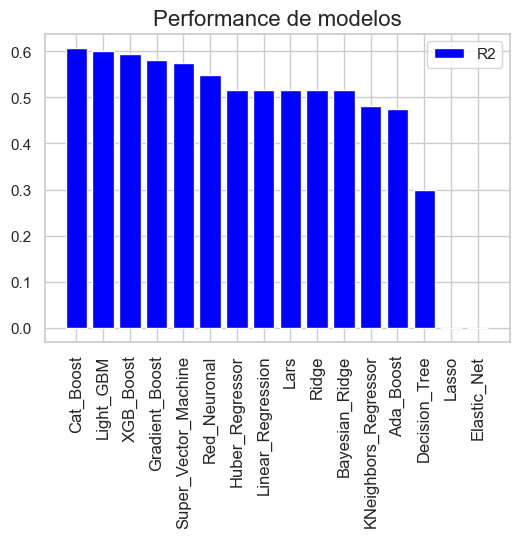

In [220]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,4))

ax.bar(df_models["Modelo"], df_models["R2"], label='R2', color='blue')
# ax.bar(df_models["Modelo"], df_models["MAE"], label='MAE', color='orange')
ax.set_xticklabels(df_models["Modelo"], rotation=90, fontsize=12)
ax.set_title('Performance de modelos', fontsize=16)
ax.legend(loc='best')

plt.show()

In [ ]:
import plotly.express as px

fig = px.bar(df_models, x="Modelo", y=["R2", "MAE"], barmode="group")
fig.update_layout(title="Performance de modelos", xaxis_title="Modelo", yaxis_title="Valor")

fig.show()

In [ ]:
import plotly.express as px

palette = ["#660000","#990033","#5F021F","#8C001A","#FF9000"]
palette_11 = ["#03071e","#370617","#6a040f","#9d0208","#d00000","#dc2f02","#e85d04","#f48c06","#faa307","#ffba08", "#FFC42D"]
values_com = df_models["R2"]

fig = px.bar(df_models.head(5),
            x='comunidad',
            y='Ventas')

fig.update_traces(
                marker_color=np.tile(palette_11, len(df_models["Modelo"])),
                text=values_com,
                textposition='auto',
                textfont=dict(size=16))

fig.update_xaxes(
                tickangle=-45,
                tickfont=dict(size=18))

fig.update_yaxes(
                tickfont=dict(size=18),
                gridcolor='gray')


fig.update_layout(
                    width=1000,
                    height=600,
                    title_text="Performance modelos",
                    title_font=dict(size=30),
                    title_x=0.5, title_y=0.95,
                    plot_bgcolor='rgba(0,0,0,0)',
                    paper_bgcolor='rgba(0,0,0,0)',
                    yaxis_title='Medida',
                    xaxis_title='Modelos',
                    yaxis_title_font=dict(size=25),
                    xaxis_title_font=dict(size=25),
                    font=dict(family='Century Gothic'),                           
                    showlegend=False)

# fig.add_annotation(x=4.4, y=5, xanchor='right', yanchor='top',
#                     text='Fuente: Anuario APM 2023',
#                     font=dict(family='Century Gothic', size=16),
#                     showarrow=False)                    

# fig.write_image(r'graficos\grafico_barras_facturacion_comunidades_2018_2022.png')
fig.show()

### Un voting para los que mejores resultados dan

In [224]:
from sklearn.ensemble import VotingRegressor

estimators = [('grad', GradBoost_Reg_Model),
              ('lin_reg', LinReg_Model),
              ('huber', Huber_Reg_Model),
              ('cat', CatBoost_Reg_Model),
              ('lars', Lars_Model),
              ('rndfrst', RndFrst_Model),
              ('red_neu',MLP_Model),
              ]

Voting_Regressor_Model = VotingRegressor(estimators=estimators)
Voting_Regressor_Model

VotingRegressor(estimators=[('grad',
                             GradientBoostingRegressor(max_depth=8,
                                                       n_estimators=300,
                                                       random_state=42,
                                                       verbose=False)),
                            ('lin_reg', LinearRegression()),
                            ('huber', HuberRegressor(alpha=0.5, epsilon=1.5)),
                            ('cat',
                             <catboost.core.CatBoostRegressor object at 0x000002895B548A90>),
                            ('lars', Lars(random_state=42)),
                            ('rndfrst', RandomForestRegressor(random_state=42)),
                            ('red_neu', MLPRegressor(random_state=42))])

In [225]:
from sklearn.metrics import r2_score, mean_absolute_error

model_list = [MLP_Model, CatBoost_Reg_Model, GradBoost_Reg_Model, Huber_Reg_Model, Lars_Model, LinReg_Model, RndFrst_Model, Voting_Regressor_Model]

for model in model_list:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model.__class__.__name__, r2_score(y_test, y_pred))

MLPRegressor 0.5488501874966181
CatBoostRegressor 0.6081453148761355
GradientBoostingRegressor 0.5818736538974697
HuberRegressor 0.5168828544801369
Lars 0.5164325566915524
LinearRegression 0.5165686533048377
RandomForestRegressor 0.5750795731764055
VotingRegressor 0.5972689954112425


### A través de GridSearch trato de optimizar el de mejor resultado: CatBoost

Algunas recomendaciones sobre los hiperparámetros que se pueden ajustar en CatBoost y los rangos de valores que podrías probar. Lista de los hiperparámetros y los rangos sugeridos:

- learning_rate: tasa de aprendizaje, controla la velocidad a la que se adapta el modelo a los datos. Valores típicos son ```[0.01, 0.03, 0.1, 0.3, 1]```.
- max_depth: profundidad máxima del árbol. Un valor demasiado alto puede provocar sobreajuste. Valores típicos son ```[3, 5, 7, 9, 11]```, -1 (sin límite de profundidad).
- l2_leaf_reg: parámetro de regularización L2. Ayuda a prevenir el sobreajuste. Valores típicos son ```[1, 3, 5, 7, 9]```.
- colsample_bylevel: porcentaje de características que se toman en cuenta para cada árbol. Valores típicos son ```[0.5, 0.7, 0.8, 1]```.
- subsample: porcentaje de muestras que se toman en cuenta para cada árbol. Valores típicos son ```[0.5, 0.7, 0.8, 1]```.
- iterations: número de iteraciones del modelo. Valores típicos son ```[500, 1000, 2000]```.

El valor para el parámetro cv en GridSearchCV depende del tamaño de tus datos y del tiempo se esté dispuesto a esperar para que el modelo se ajuste. En general, se recomienda usar un valor de cv entre 5 y 10 para conjuntos de datos de tamaño moderado a grande.

Dado que el conjunto de datos es de unos 10,000 registros, un valor de cv de 5 sería razonable. Esto significa que los datos se dividirían en 5 partes iguales y se ajustarían 5 modelos separados, cada uno de los cuales se ajusta en 4 partes y se evalúa en la restante.

In [ ]:
# RANDOM FOREST
grid_random_forest = {"n_estimators": [120], # El Random Forest no suele empeorar por exceso de
                                             # estimadores. A partir de cierto numero no merece la pena
                                             # perder el tiempo ya que no mejora mucho más la precisión.
                                             # Entre 100 y 200 es una buena cifra

                     
                     "max_depth": [3,4,5,6,10,15,17], # No le afecta tanto el overfitting como al decissiontree.
                                                      # Podemos probar mayores profundidades
                      
                     "max_features": ["sqrt", 3, 4] # Numero de features que utiliza en cada split.
                                                    # cuanto más bajo, mejor generalizará y menos overfitting.
                                                    
                     }

In [233]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[500, 1000, 2000],
              'max_depth': [3, 5, 7, 9, 11],
              'learning_rate': [0.01, 0.03, 0.1, 0.3, 1],
            }

model_GridSearch = GridSearchCV(CatBoost_Reg_Model, param_grid= parameters, cv= 5)
model_GridSearch.fit(X_train, y_train)

In [231]:
model_GridSearch.best_params_

{'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200}

In [232]:
from sklearn.metrics import r2_score, mean_absolute_error

best_model = model_GridSearch.best_estimator_
y_pred_best_Model = best_model.predict(X_test)

R2_best_Model = r2_score(y_test, y_pred_best_Model)
MAE_best_Model = mean_absolute_error(y_test, y_pred_best_Model)

print("R2 (test):", round(((R2_best_Model)*100),2),"%")
print("MAE (test):", MAE_best_Model)

R2 (test): 59.95 %
MAE (test): 0.579003846838962
